In [1]:
%matplotlib inline
import os
import numpy as np
from skimage.io import imread
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from skimage import filters as skthresh
from skimage.morphology import opening, closing, disk
from scipy.ndimage import binary_fill_holes
from scipy.ndimage import distance_transform_edt
from skimage.morphology import label
from skimage.feature import peak_local_max
from skimage.segmentation import mark_boundaries, watershed
base_dir = os.path.join('input')

In [2]:
all_files = glob('input/nmc_90wt_0bar/NMC_90wt_0bar/grayscale/*.tif')
all_files2 = glob('input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/*.tif')
all_files = np.concatenate((all_files2, all_files))
all_files

array(['input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_001.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_002.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_003.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_004.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_005.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_006.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_007.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_008.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_009.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_010.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_011.tif',
       'input/NMC_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90w

In [3]:
tiff_df = pd.DataFrame(dict(path=all_files))
tiff_df['frame'] = tiff_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
tiff_df['experiment'] = tiff_df['frame'].map(lambda x: '_'.join(x.split('_')[0:-1]))
tiff_df['slice'] = tiff_df['frame'].map(lambda x: int(x.split('_')[-1]))
print('Images Found:', tiff_df.shape[0])

Images Found: 436


In [11]:
tiff_df.sample(3)

,path,frame,experiment,slice
182,input/NMC_90wt_2000bar/NMC_90wt_2000bar/graysc...,NMC_90wt_2000bar_183,NMC_90wt_2000bar,183
221,input/nmc_90wt_0bar/NMC_90wt_0bar/grayscale/NM...,NMC_90wt_0bar_004,NMC_90wt_0bar,4
18,input/NMC_90wt_2000bar/NMC_90wt_2000bar/graysc...,NMC_90wt_2000bar_019,NMC_90wt_2000bar,19


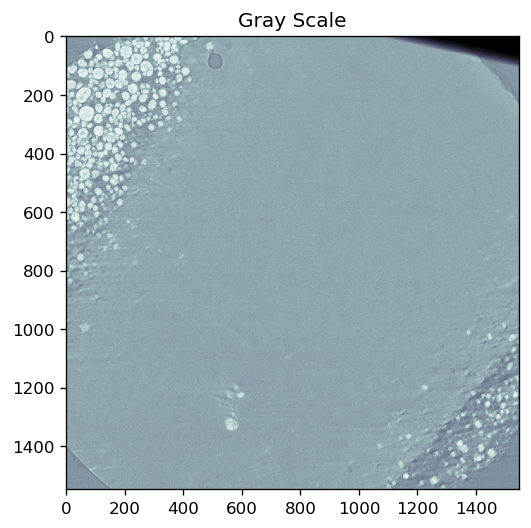

In [28]:
%matplotlib inline
random_path = tiff_df.sample(125, random_state = 123)['path'].values[0]
bw_img = imread(random_path)[250:-250, 250:-250]
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5), dpi=120)
ax1.imshow(bw_img, cmap='bone')
ax1.set_title('Gray Scale');

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


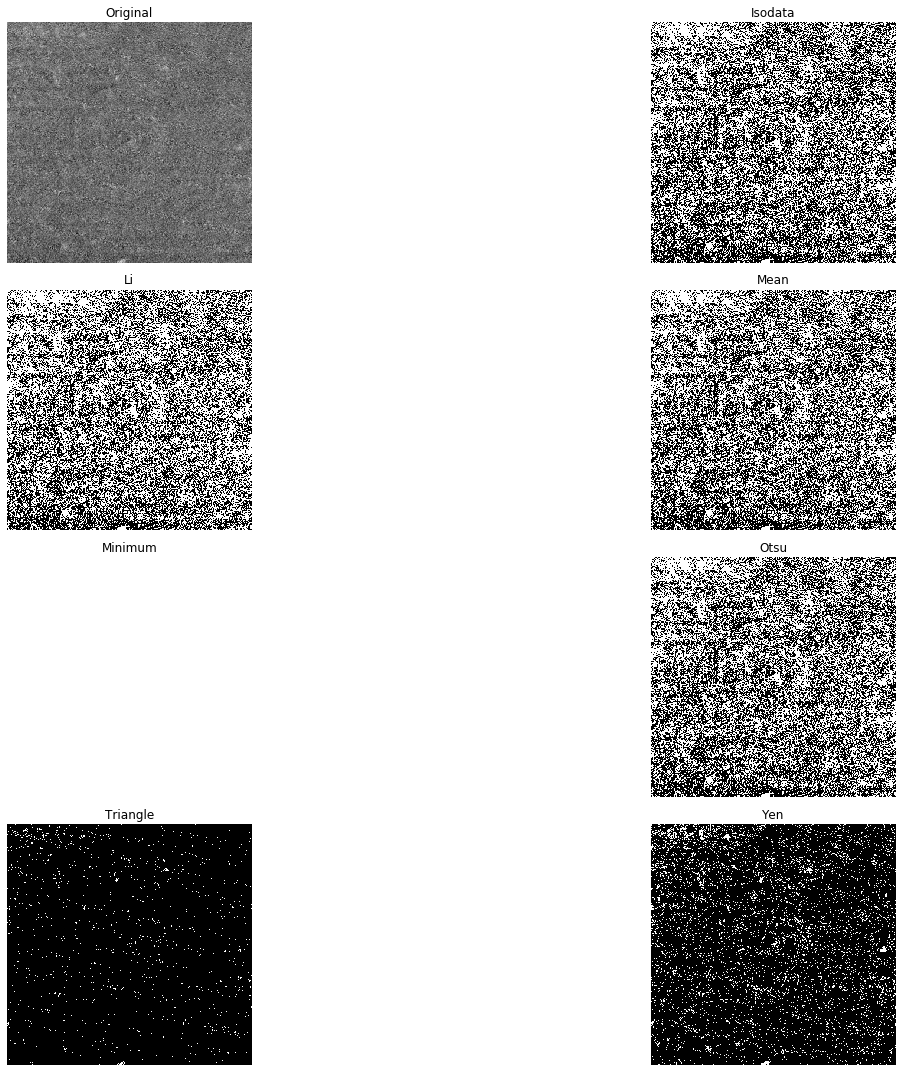

In [29]:
try:
    skthresh.try_all_threshold(bw_img[450:1100, 450:1110], figsize = (24, 15))
except RuntimeError as re:
    print('Try all threshold is one whiny function: {}'.format(re))

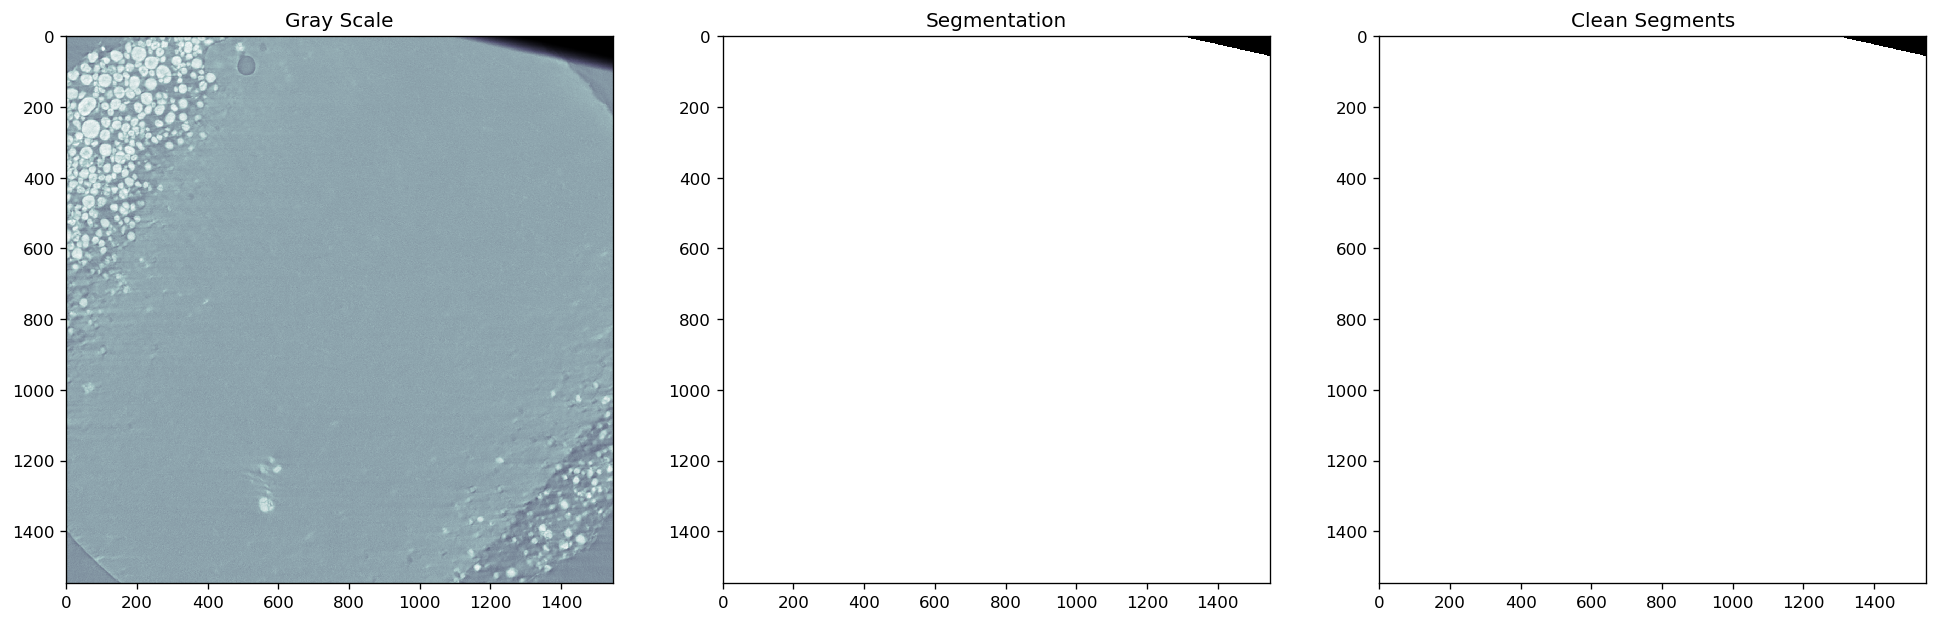

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), dpi=120)
ax1.imshow(bw_img, cmap='bone')
ax1.set_title('Gray Scale')

thresh_img = bw_img > skthresh.threshold_triangle(bw_img)
ax2.imshow(thresh_img, cmap='bone')
ax2.set_title('Segmentation')

bw_seg_img = closing(closing(opening(thresh_img, disk(3)),disk(1)), disk(1))
bw_seg_img = binary_fill_holes(bw_seg_img)

ax3.imshow(bw_seg_img, cmap='bone')
ax3.set_title('Clean Segments');

# Connected Component Labeling

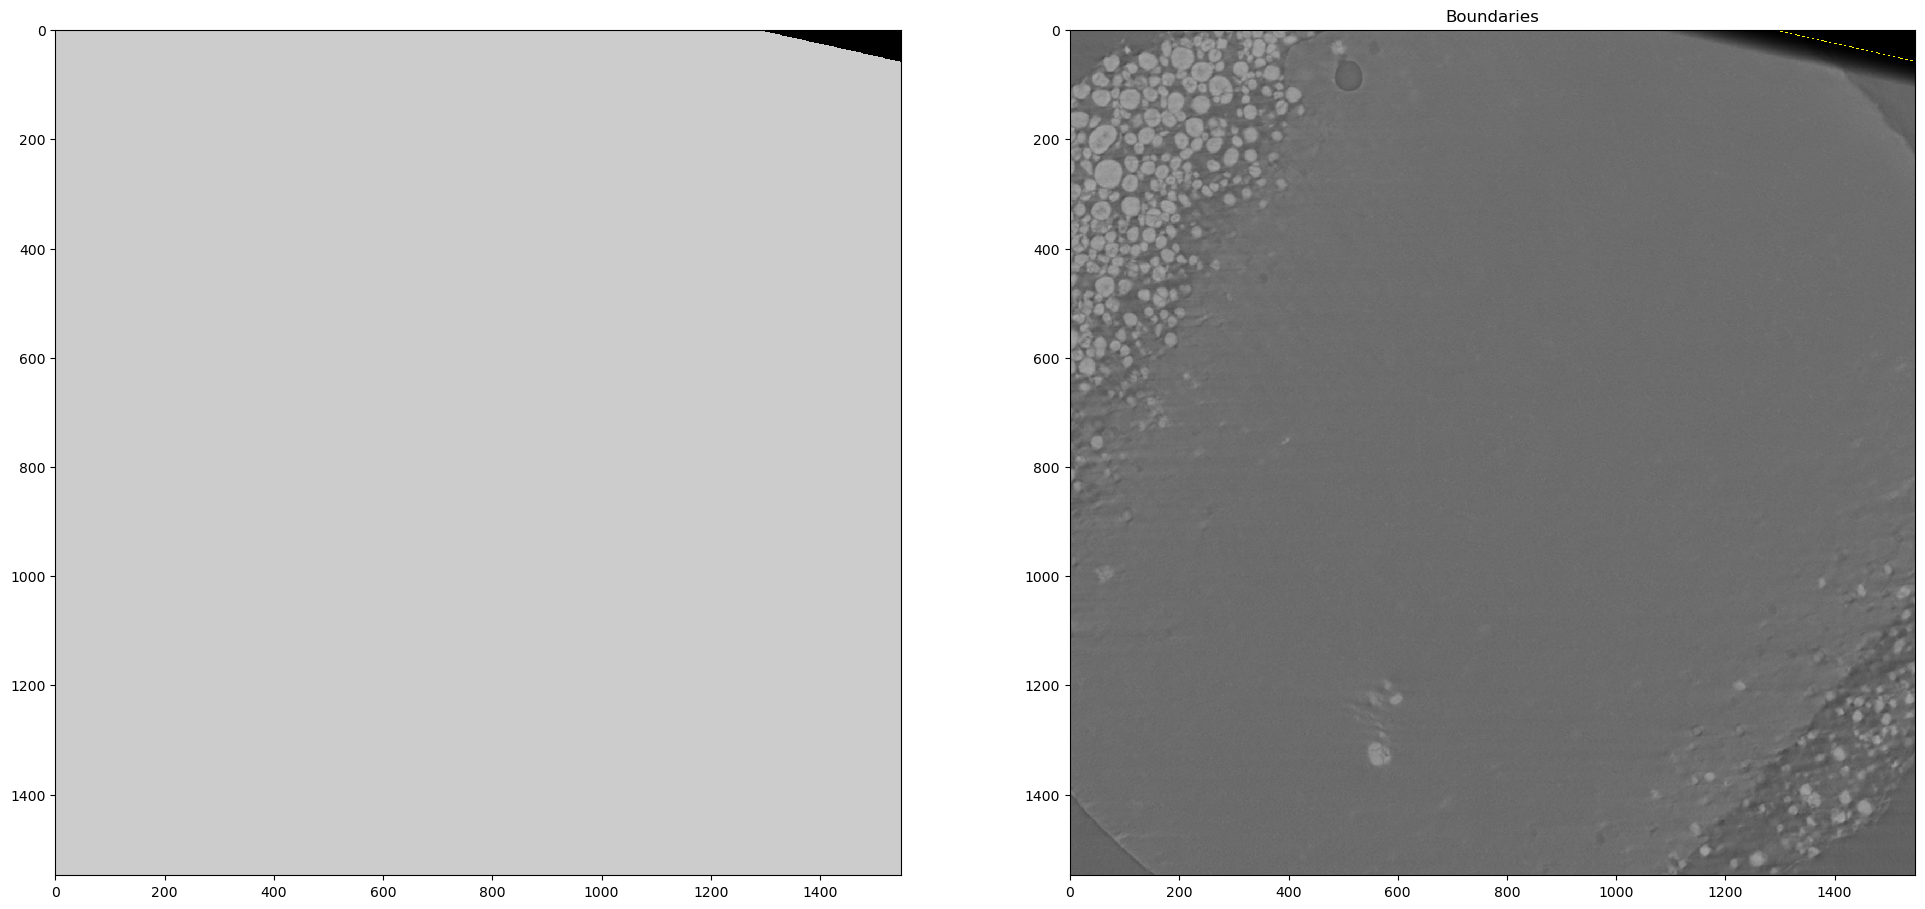

In [31]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(24, 12), dpi=100)
bw_lab_img = label(bw_seg_img)
ax1.imshow(bw_lab_img, cmap = 'nipy_spectral')


# detect boundaries
ax3.imshow(mark_boundaries(label_img = bw_lab_img, image = bw_img))
ax3.set_title('Boundaries');